In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("online_retail_dataset.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00,70.92,51445.0,Spain,0.200000,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00,51.74,28879.0,United States,0.230000,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00,85.25,21825.0,Portugal,0.200000,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00,39.64,43199.0,United Kingdom,0.310000,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium


In [9]:
df = df.dropna(subset=["CustomerID", "Quantity", "UnitPrice", "ShippingCost"])
df["CustomerID"] = df["CustomerID"].astype(int)
df["TotalSpent"] = (df["Quantity"] * df["UnitPrice"]) - df["Discount"] + df["ShippingCost"]

In [11]:
mean_spent = df["TotalSpent"].mean()
median_spent = df["TotalSpent"].median()
mode_spent = df["TotalSpent"].mode()[0]

print(f"Mean Total Spent: ${mean_spent:.2f}")
print(f"Median Total Spent: ${median_spent:.2f}")
print(f"Mode Total Spent: ${mode_spent:.2f}")


Mean Total Spent: $1276.08
Median Total Spent: $966.43
Mode Total Spent: $183.87


In [15]:
df["SpenderCategory"] = np.where(df["TotalSpent"] >= mean_spent, "High Spender", "Low Spender")
spender_counts = df.groupby("SpenderCategory")["CustomerID"].nunique()

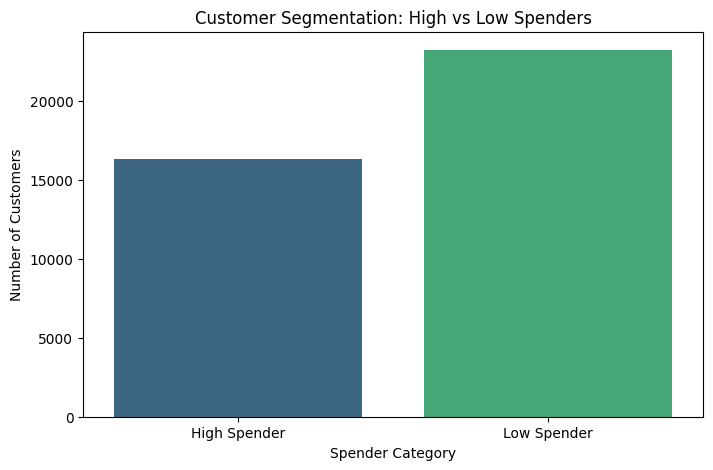

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(x=spender_counts.index, y=spender_counts.values, hue=spender_counts.index, palette="viridis", legend=False)
plt.xlabel("Spender Category")
plt.ylabel("Number of Customers")
plt.title("Customer Segmentation: High vs Low Spenders")
plt.show()